In [1]:
% run __initialize.ipynb

In [2]:
df = sns.load_dataset('titanic')

# Create Dataset Object

In [3]:
dep_var = 'survived'
id_var = ['pclass', 'sex']
indep_var = ['age', 'sibsp', 'parch', 'fare']

dummy_df = pd.get_dummies(df[['embarked','class','who']])
DF = ModelDF(df.merge(dummy_df, left_index=True, right_index=True), dep_var, id_var, indep_var + dummy_df.columns.tolist())
DF.X = DF.X.fillna(0)

In [4]:
DF.train_test_split()
DF.test.y.value_counts()

0    140
1     83
Name: survived, dtype: int64

In [5]:
from sklearn.ensemble import RandomForestClassifier
cl = RandomForestClassifier(n_estimators = 50)
cl.fit(DF.train.X, DF.train.y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

# Plot feature results, feature importances

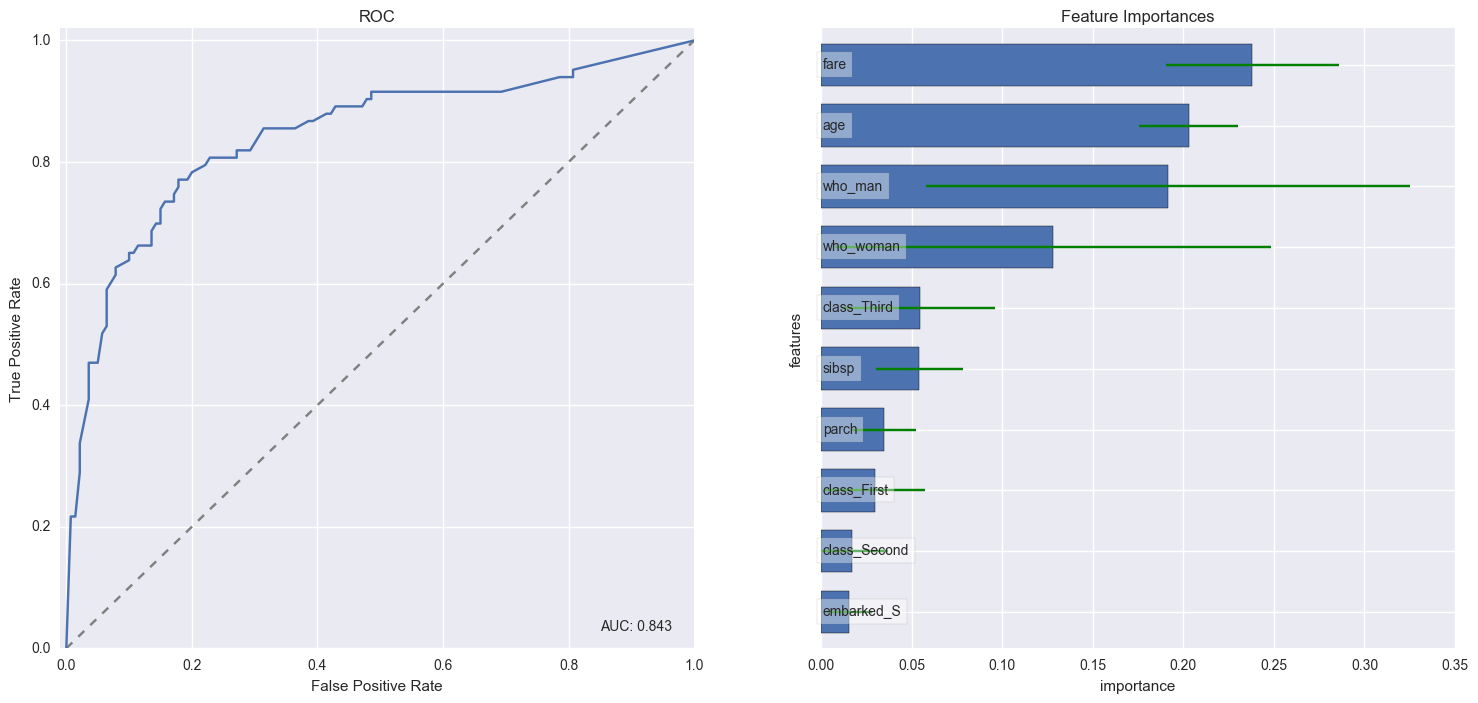

In [6]:
fig = plt.figure(figsize=(18,8))

ax = fig.add_subplot(121)
DF.test.pred = cl.predict_proba(DF.test.X)[:,1]

ds_plotting.plot_roc(DF.test.y,DF.test.pred, ax=ax)
ax = fig.add_subplot(122)
df_imp = ds_plotting.plot_importances(cl,DF.indep_var, error_bars=True, ax = ax, n_features=10)

# Tree Interpreter

In [7]:
# for plotting purposes
FEATURES = df_imp.index.tolist()

In [11]:
pred, bias, contrib = ti.predict(cl, DF.test.X)
DF.test.pred = pred[:,1]

# create contrib df
contrib_df = pd.DataFrame(contrib[:, :, 1], columns=DF.indep_var)

In [59]:
row_values

embarked_S       1.0
class_Second     1.0
class_First      0.0
parch            1.0
sibsp            2.0
class_Third      0.0
who_woman        0.0
who_man          1.0
age             23.0
fare            11.5
Name: 529, dtype: float64

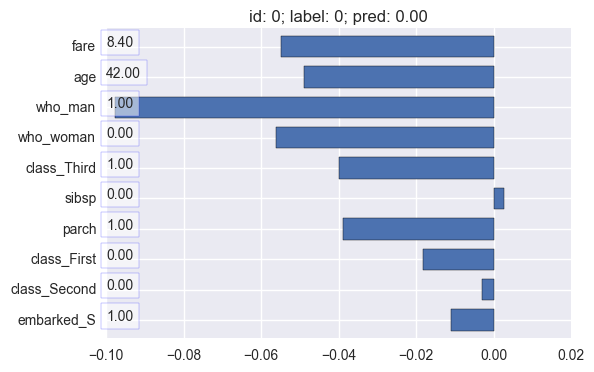

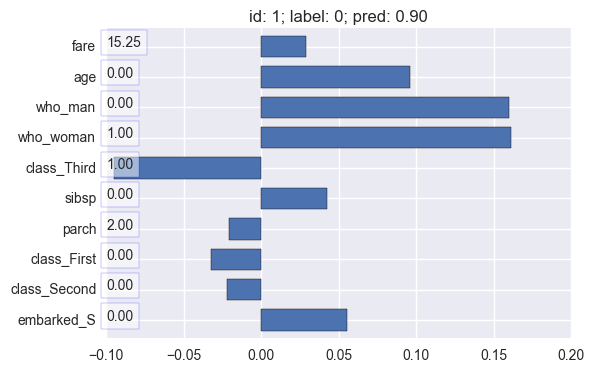

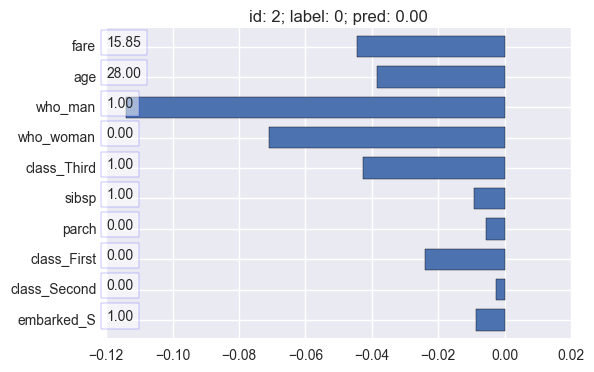

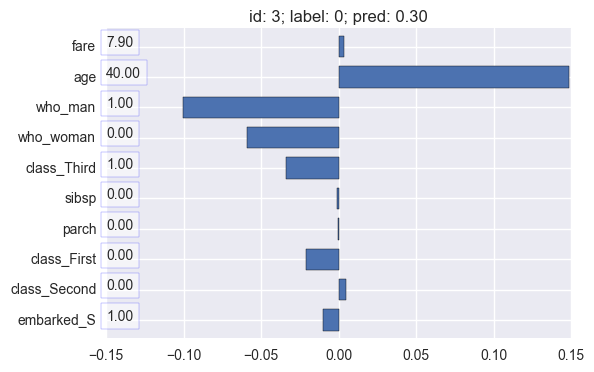

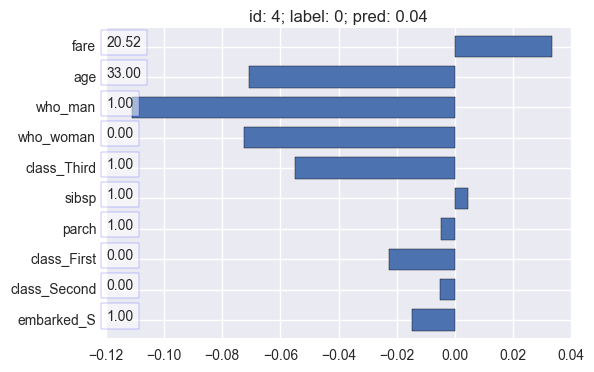

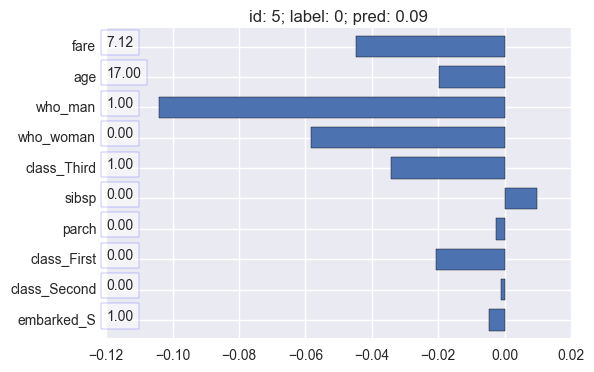

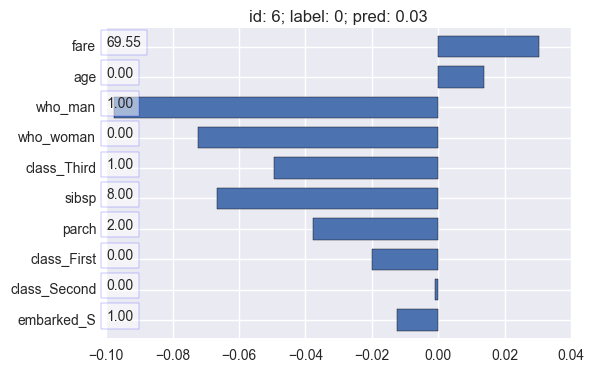

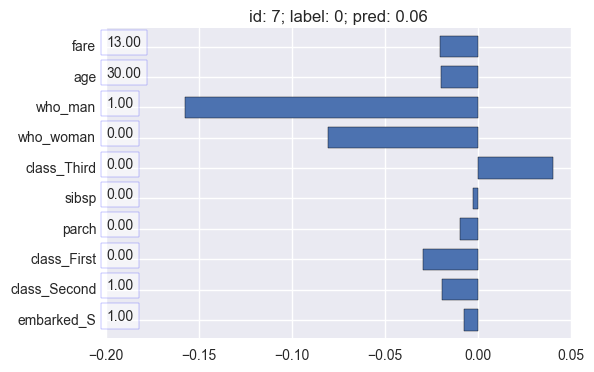

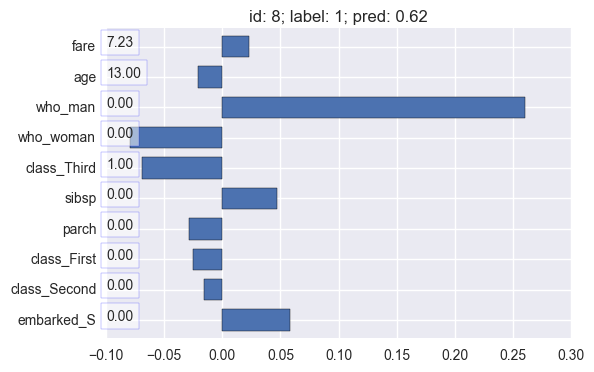

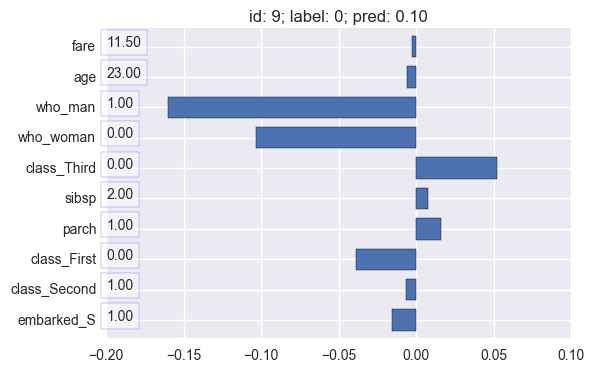

In [61]:
for i in range(10):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    label = DF.test.y.iloc[i]
    pred = DF.test.pred[i]
    row_contrib = contrib_df.iloc[i][FEATURES]
    row_values = DF.test.X.iloc[i][FEATURES]
    ax = ds_plotting.plot_contrib(row_contrib, ax, label, pred)
    ds_plotting.plot_contrib_values(row_values, ax)

# Agg feature generator

In [118]:
% run __initialize.ipynb
# dummy variables
dummy = DummyVariable()
s = pd.Series(['hello']*5 + ['yo'] + ['world']*3 + ['test']*4 + ['big'] + ['dsfsd sf- sdf- dsf_f ds'] + ['thank you']*4, name = 'hamburger')
dummy.map_dummy(s, 5)

# date features
rng = pd.date_range('1/1/2011', periods=72, freq='H')
date_feat = DateFeatures()
date_feat.create('birthdays')

# agg features on numeric
agg_feat_gen = AggFeatures()
agged_features = []
cols_to_agg_on = {'age':'of_age', 'fare':'of_fare'}
for k,v in cols_to_agg_on.iteritems():
    agged_features.extend(agg_feat_gen.gen_features(k,v))
agged_features_str = ',\n'.join(agged_features)
print agged_features_str

The sql_magic extension is already loaded. To reload it, use:
  %reload_ext sql_magic
MIN(fare) AS MIN_of_fare,
MAX(fare) AS MAX_of_fare,
AVG(fare) AS AVG_of_fare,
SUM(fare) AS SUM_of_fare,
PERCENTILE(CAST(fare AS BIGINT) AS MEDIAN_of_fare,
MIN(age) AS MIN_of_age,
MAX(age) AS MAX_of_age,
AVG(age) AS AVG_of_age,
SUM(age) AS SUM_of_age,
PERCENTILE(CAST(age AS BIGINT) AS MEDIAN_of_age


In [59]:
%%readsql
SELECT 1, --hello world
       2, -- i am here
       3

,?column?,?column?,?column?
0,1,2,3


In [2]:

value_counts_per = (s.value_counts()/s.value_counts().sum())[0:4].sort_index()
value_counts_per

NameError: name 's' is not defined

# Python + Powerpoint

In [255]:
import ds_powerpoint
from pptx import Presentation

In [300]:
my_template = 'ds_powerpoint/template.pptx'
template_explained = 'ds_powerpoint/template_explained.pptx'
sample_image = 'ds_powerpoint/sample_image.png'
my_ppt = 'ds_powerpoint/my_presentation.pptx'

ds_powerpoint.analyze_ppt(my_template, template_explained)

0 Title 1
1 Subtitle 2
0 Title 1
1 Content Placeholder 2
0 Title 1
1 Text Placeholder 2
0 Title 1
1 Content Placeholder 2
2 Content Placeholder 3
0 Title 1
1 Text Placeholder 2
2 Content Placeholder 3
3 Text Placeholder 4
4 Content Placeholder 5
0 Title 1
No Title for Layout 6
0 Title 1
2 Text Placeholder 2
13 Picture Placeholder 3
0 Title 1
1 Content Placeholder 2
2 Text Placeholder 3
0 Title 1
1 Picture Placeholder 2
2 Text Placeholder 3
0 Title 1
1 Vertical Text Placeholder 2
0 Vertical Title 1
1 Vertical Text Placeholder 2


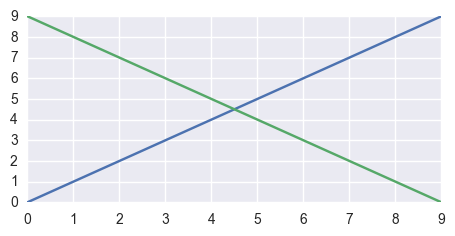

In [338]:
# create sample image
from matplotlib import pyplot as plt
w,h=5.34,6.4
w,h=5.34,2.4
plt.figure(figsize=(w,h))
plt.plot(range(10), range(10))
plt.plot(range(10), range(10)[::-1])
plt.savefig(sample_image)

## Insert image into placeholder position

In [349]:
from pptx.util import Inches

# read in template slide
prs = Presentation(my_template)
title_slide_layout = prs.slide_layouts[7]
slide = prs.slides.add_slide(title_slide_layout)

# content
title = 'Hello, this is a title'
body = ['Sed ut perspiciatis unde omnis iste natus error sit voluptatem accusantium doloremque laudantium', 'Totam rem aperiam, eaque ipsa quae ab illo inventore veritatis et quasi architecto']
image_location = 'ds_powerpoint/sample_image.png'

# identify relevant slide objects
ppx_title = slide.shapes.title
ppx_body = slide.placeholders[2]
ppx_content = slide.placeholders[13]
print 'Image size is: {}'

# update slide
ppx_title.text = title
tf = ppx_body.text_frame
for b in body:
    tf.add_paragraph().text = b
pic = ppx_content.insert_picture(image_location)

# save slide to disk
prs.save(my_ppt)

Image size is: {}


## Drop image in specific location

In [350]:
from pptx.util import Inches

# create new slide
title_slide_layout = prs.slide_layouts[7]
slide = prs.slides.add_slide(title_slide_layout)

# content
title = 'Hello, this is a title'
body = ['Sed ut perspiciatis unde omnis iste natus error sit voluptatem accusantium doloremque laudantium', 'Totam rem aperiam, eaque ipsa quae ab illo inventore veritatis et quasi architecto']
image_location = 'ds_powerpoint/sample_image.png'

# identify relevant slide objects
ppx_title = slide.shapes.title
ppx_body = slide.placeholders[2]
print 'Image size is: {}'

# update slide
ppx_title.text = title
tf = ppx_body.text_frame
for b in body:
    tf.add_paragraph().text = b
    
# position image
top, left = Inches(1),Inches(3)
slide.shapes.add_picture(image_location, left, top)
# pic = ppx_content.insert_picture(image_location)

# save slide to disk
prs.save(my_ppt)

Image size is: {}
